# Assignment
In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.


- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

data=pd.read_csv("E:/user/Notebooks/data/titanic/train.csv", low_memory=False)

In [10]:
data["is_male"] = pd.get_dummies(data.Sex, drop_first=True)
data["Cabin"] = pd.get_dummies(data.Cabin, drop_first=True)
data["Embarked"] = pd.get_dummies(data.Embarked, drop_first=True)

In [11]:
data["Cabin"].fillna(data["Cabin"].mean(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mean(), inplace=True)
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [12]:
X=data[['Pclass','is_male','Fare','SibSp','Parch']]
y=data[['Survived']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=111)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [13]:
train_prediction = log_reg.predict(X_train)
test_prediction = log_reg.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print("accuracy_score() value        : ",  accuracy_score(y_test, test_prediction))
#

accuracy_score() value        :  0.8044692737430168


In [15]:
from sklearn.metrics import precision_score
print("precision_score() value      : ",  precision_score(y_test, test_prediction))

precision_score() value      :  0.7818181818181819


In [16]:
from sklearn.metrics import recall_score
print("recall_score() value      : ",  recall_score(y_test, test_prediction))

recall_score() value      :  0.6515151515151515


In [17]:
from sklearn.metrics import f1_score
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

f1_score() value     :  0.7107438016528926


E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


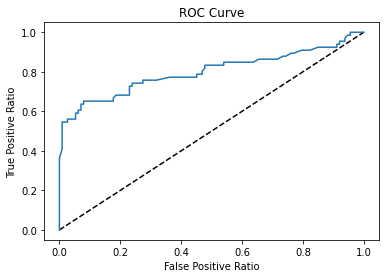

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


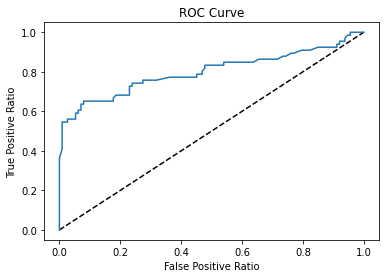

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


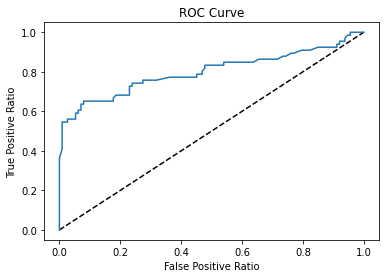

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


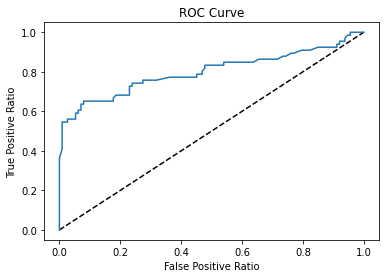

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


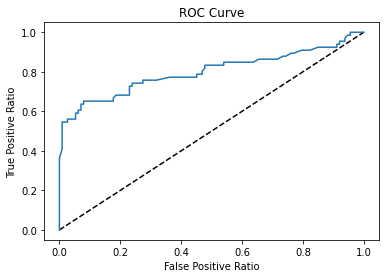

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


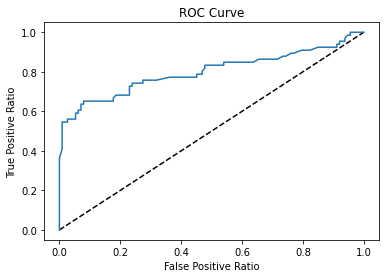

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


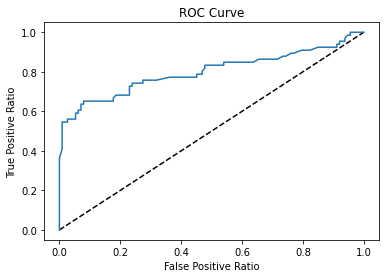

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

C_values = [0.001,0.01, 0.1,1,10,100, 1000]

import matplotlib.pyplot as plt
# Plot ROC curve
for c in C_values:
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train, y_train)
    test_prediction_proba_ = log_reg.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba_)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)

    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC Curve')

    plt.show()

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


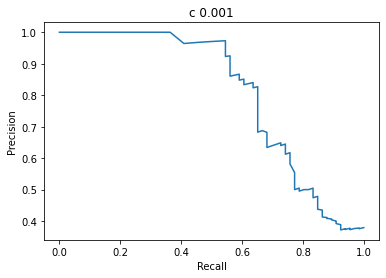

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


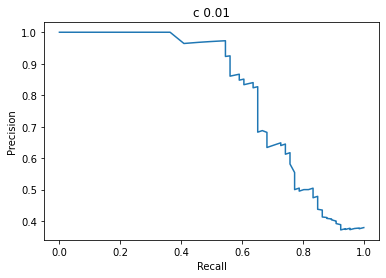

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


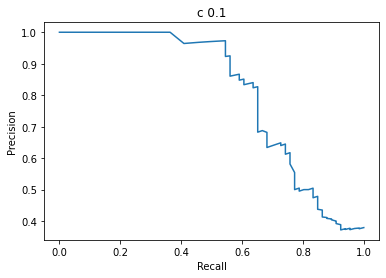

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


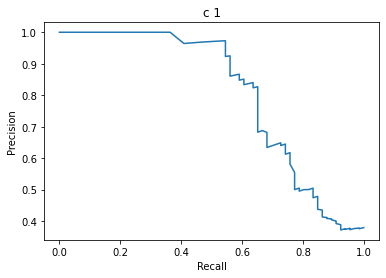

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


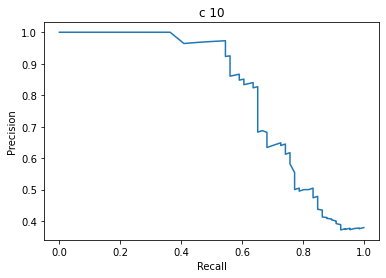

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


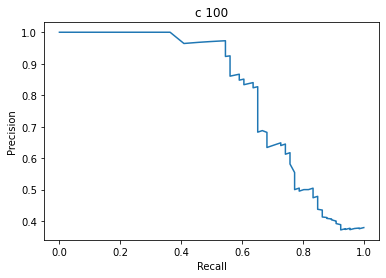

E:\user\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


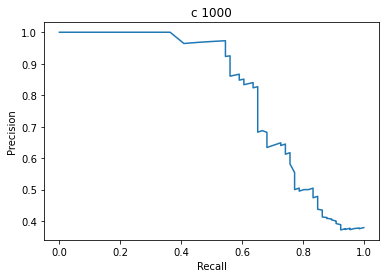

In [43]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Plot ROC curve
for c in C_values:
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train, y_train)
    test_prediction_proba_ = log_reg.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba_)

    plt.plot(recall, precision)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('c {}'.format(c))

    plt.show()